# Introduction

Our goal for the project was to find the best neighborhood in Pittsburgh... if you were a dog.

![alt text](https://media.giphy.com/media/8lMWzUYpCuLMIOkiCU/giphy.gif)

# Choosing Our Data

Obviously, dogs cannot collect & distribute their own data (although that would be pretty cool & helpful in our project). So we had to get creative. 

Our first data set was parks! Dogs love exercise and to be outside. So we tried to find the neighborhood with most park area.

Our next set was to look at the water sources in Pittsburgh. Dogs need water to stay healthy, even when they are outside of their household. So we tried to find the neighborhood with the most water fountains.

Our final set was looking at 311 requests. 311 requests are non-emergent situations that may need assistance. We were able to find reports of "Barking Dogs" to find where more dogs may be present. More dogs = more dog friends and a dog friendly neighborhood.

# Ben's Part!!!!

# Best Neighborhood for a Dog in Pittsburgh
## By Park Area:

# DOGS LIKE PARKS!!!!
### What neighborhood has the access to the most park area!!!


![dog](https://media.giphy.com/media/ZNegC7wFpuQT7nurZ0/giphy.gif)

In [1]:
# importing
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import random

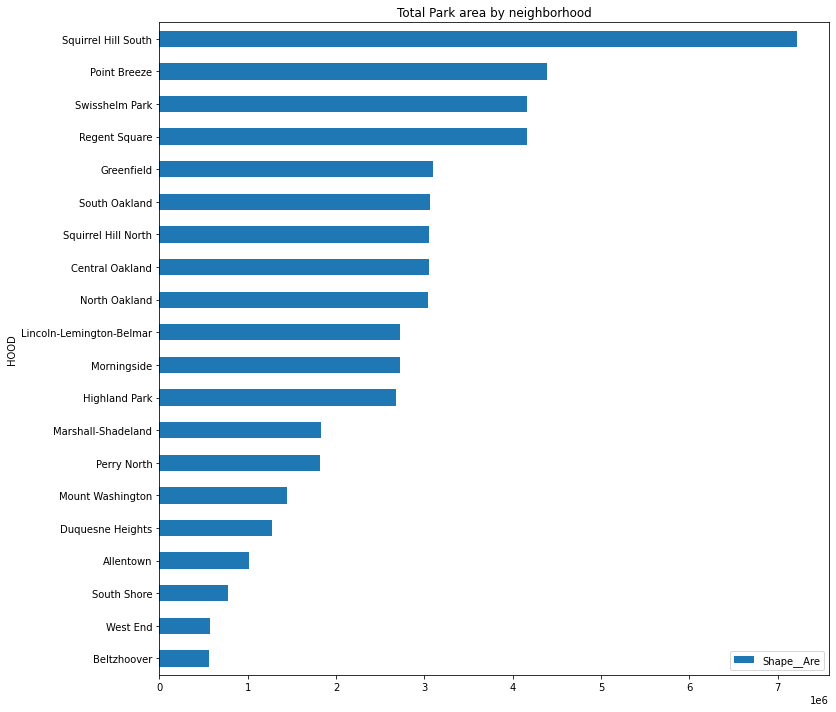

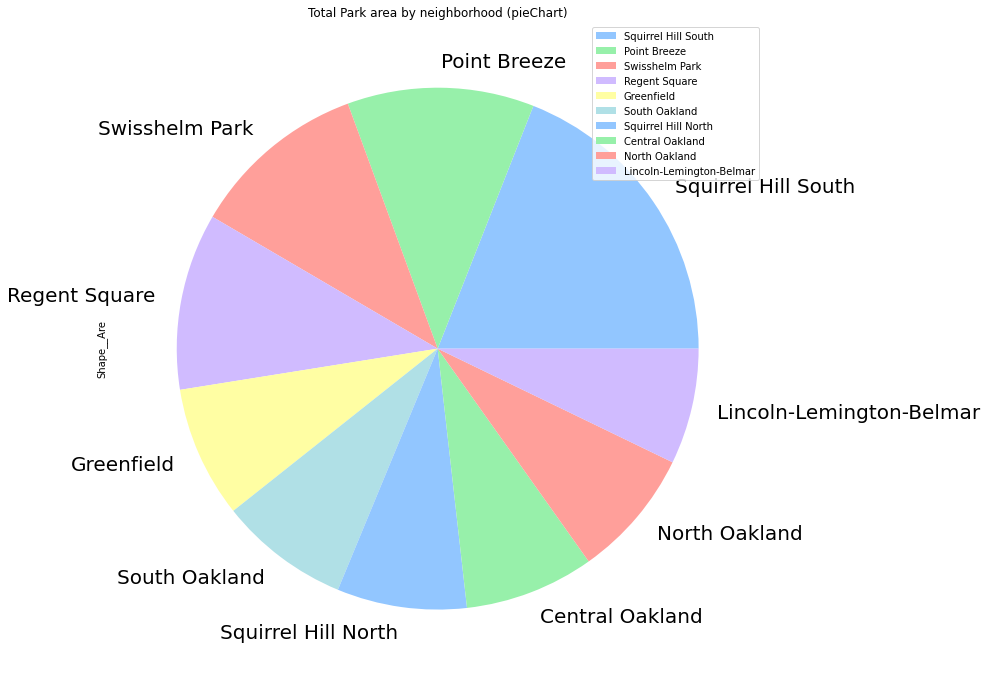

In [2]:
#reading in my dataframe to make this dataset I used arcgis
#to split the neighborood csv by the park csv based on whether there was overlap
data = pd.read_csv("realData.csv")

#taking in the real data then cutting down the data set into important values
#then sorting them based on the park area 
data1 = data[['HOOD','Shape_Area', 'updatepknm','Shape__Are']]
shapeData = data1.sort_values(by='Shape_Area',ascending=False)
df = shapeData[['Shape__Are', 'HOOD', 'Shape_Area','updatepknm']]


#this is the part where everything is added together if it has the same hood name
aggregation_functions = {'Shape__Are': 'sum', 'Shape_Area': 'sum','HOOD': 'first','updatepknm': 'sum'}

df_new = df.groupby(df['HOOD']).aggregate(aggregation_functions)
df_new = df_new.sort_values(by='Shape__Are',ascending=False)
df_new = df_new[['HOOD', 'updatepknm','Shape__Are']]


#this is the graphing part
df_new[0:20].plot(kind='barh',rot = 0, figsize=(12,12), title="Total Park area by neighborhood").invert_yaxis()
plt.style.use('seaborn-pastel')
df_new[0:10].plot.pie(y='Shape__Are', figsize=(12,12), fontsize=20, title="Total Park area by neighborhood (pieChart)")


plt.show()

### Above is a bar graph and a pie chart representing the area of parks by neighborhood. Squirrel Hill South is shown to have the most.

### This is a list of the neighborhoods
#### It shows the top 30 neighborhoods, the parks that are in there, then the total park area 

In [3]:
df_new = df_new[['updatepknm','Shape__Are']]
df_new.head(30)

,updatepknm,Shape__Are
HOOD,,
Squirrel Hill South,Frick ParkSchenley ParkDavis ParkFour Mile Run...,7.220538e+06
Point Breeze,Frick ParkMellon ParkMellon Park IslandSterret...,4.393606e+06
Swisshelm Park,Frick ParkSwisshelm ParkWindermere Circle 1 & ...,4.166232e+06
Regent Square,Frick ParkRegent Square War Memorial,4.157575e+06
Greenfield,Magee ParkSchenley ParkFour Mile Run ParkSalin...,3.094934e+06
South Oakland,Schenley ParkFrazier ParkLawn and Ophelia Park...,3.066373e+06
Squirrel Hill North,Schenley ParkWightman Park,3.051154e+06
Central Oakland,Schenley ParkZulema ParkOakland SquareBoundary...,3.048607e+06
North Oakland,Schenley ParkHarris Triangle,3.037520e+06


### This is a test to confirm that the addition of each neighborhood works
This adds the data in a different way, as you can see it matches the data above, meaning that the addition method I did probably worked as intended

In [4]:
data = pd.read_csv("realData.csv")

data1 = data[['HOOD','Shape_Area', 'updatepknm','Shape__Are']]
data1 = data1.sort_values(by='HOOD')
shapeData = data1.sort_values(by='Shape_Area',ascending=False)

sqs = shapeData[shapeData.HOOD == "Squirrel Hill South"]
sqs = sqs[["Shape__Are"]]
sqSum = sqs.sum()
print(sqSum, "sq of total park in squirrel hill south")

#npNumbers = data[data.Park_Name == "North Park"]

Shape__Are    7.220538e+06
dtype: float64 sq of total park in squirrel hill south


# The data from above shows that the top three neighborhoods with the most parks are: 
## #1)Squirrel hill south
### #2)Point Breeze
#### #3)Swisshelmpark

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

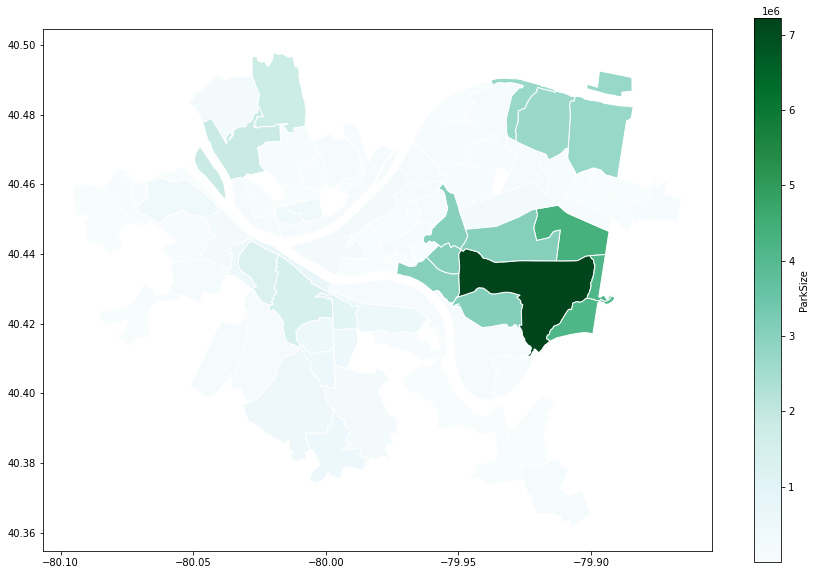

In [6]:
df_map = neighborhoods.merge(df_new, how='left', left_on='hood', right_on='HOOD')
df_map.head()
df_map.plot(column='Shape__Are_y',# set the data to be used for coloring
               cmap='BuGn',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "ParkSize"}, # label the legend
               figsize=(15, 10),         # set the size # set disctricts with no data to gray
               )

### Conclusion:
The data shows that Squirrel Hill South has the most total park area per neighborhood by far. This shows that when it comes to dogs' exercise and enjoyment of the park, Squirrel Hill South can't be beat.
![dog](https://media.giphy.com/media/PSKAppO2LH56w/giphy.gif)

# Jackie's Part!!!!

## Water Fountains in Neighborhoods
##### Everyone knows that dogs, like most living things, need water to survive. When someone is walking their dog, it's important for them to make sure that they have access to water. So, when picking the best neighborhood for your dog, you should consider the amount of water fountains that are in the neighborhood.
![dog at water fountain](https://64.media.tumblr.com/c5c491671ef9edda5508d3285a41302a/tumblr_n6lhmnXMng1tv4atfo1_500.gif)

In [7]:
# import pandas
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

#### The Dataset
This dataset shows all the water fountains within Pittsburgh. It also gives the type of fountain, the neighborhood it is in, the park or area it is in, and the coordinates of the fountain, among other things.

In [8]:
# Read in data and display chart
water = pd.read_csv("WaterFountains.csv")
water

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408433,-80.028327
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440445,-79.984061
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454382,-80.008277
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450866,-80.001959
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450995,-80.001498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1646811568,Nelson Mandela Peace Park Spray Fountain,NaN,Spray,NaN,NaN,NaN,Garfield,9,10,42003101700,2,10,5,3-4,40.466093,-79.940662
221,1127368170,Westinghouse Park,Continuous,Drinking Fountain,NaN,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Point Breeze North,9,14,42003140500,2,14,4,3-14,40.452550,-79.902936
222,1861451108,Liberty Green Park,On/Off,Drinking Fountain,NaN,Most Dependable,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.462618,-79.919551
223,1019085573,Wightman Park,On/Off,Drinking Fountain,NaN,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Squirrel Hill North,8,14,42003140300,3,14,4,2-18,40.443145,-79.926970


#### Starting to Scale Down
We really only need to consider drinking fountains as far as keeping our dog hydrated goes. So here, I used a query mask in order to create a dataset with just the drinking fountains. You can see that dataset below.

In [9]:
#Query mask for just drinking fountains
query_mask = water['feature_type'] == 'Drinking Fountain'
fountains = water[query_mask]
fountains

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408433,-80.028327
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440445,-79.984061
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454382,-80.008277
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450866,-80.001959
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450995,-80.001498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1743868744,Fineview Park,On/Off,Drinking Fountain,NaN,NaN,https://tools.wprdc.org/images/pittsburgh/wate...,Fineview,1,25,42003250900,1,25,1,1-10,40.461600,-80.003854
221,1127368170,Westinghouse Park,Continuous,Drinking Fountain,NaN,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Point Breeze North,9,14,42003140500,2,14,4,3-14,40.452550,-79.902936
222,1861451108,Liberty Green Park,On/Off,Drinking Fountain,NaN,Most Dependable,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.462618,-79.919551
223,1019085573,Wightman Park,On/Off,Drinking Fountain,NaN,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Squirrel Hill North,8,14,42003140300,3,14,4,2-18,40.443145,-79.926970


#### Sorting it out
Now for this to be useful and only show what I really need, I put the neighborhoods in a dictionary and then used a loop to count how many drinking fountains were in each neighborhood. Then, I took the dictionary and created a dataset with it.

In [10]:
# Create set that says how many water fountains are in each neighborhood
neighborhood_list = fountains['neighborhood'].tolist()
fountainDict = {}
count = 0
fountain_neighborhood = []
#Creating a dictionary of neighborhoods and how many water fountains are in each
while count < 191:
    hood = neighborhood_list[count]
    if hood in fountainDict:
        fountainDict[hood] = fountainDict[hood] + 1
    else:
        fountainDict[hood] = 1
        fountain_neighborhood.append(hood)
    count = count + 1
fountainDict

#Creating a series with that dictionary
amount_of_fountains = []   
fountain_series = pd.Series(fountainDict)
fountain_series

#Create the dataframe with that series
for hood in fountain_neighborhood:
    amount_of_fountains.append(fountainDict[hood])
fountain_df = pd.DataFrame(amount_of_fountains, fountain_neighborhood)
fountain_df.columns = ['amount_of_fountains']
fountain_df.index.name = 'neighborhood'
fountain_df

,amount_of_fountains
neighborhood,
Beechview,5
Crawford-Roberts,3
Allegheny Center,4
Bedford Dwellings,1
South Side Flats,3
...,...
Central Business District,2
Middle Hill,1
Point Breeze North,2


#### Comparing Top Neighborhoods
There are still quite a few neighborhoods in this dataset. In order to compare easily, I needed to narrow down the dataset even further by isolating the neighborhoods that had more than a couple of fountains. You can see the comparison very clearly in the bar graph below.

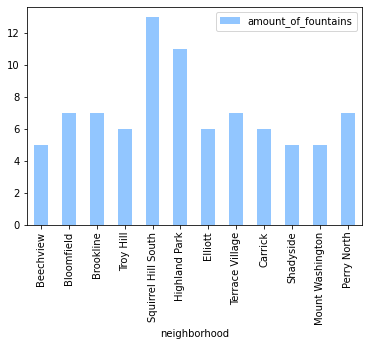

In [11]:
# Query mask to filter out smaller values
query_mask = fountain_df['amount_of_fountains'] > 4
filtered_fountain = fountain_df[query_mask]
filtered_fountain.plot(kind='bar')


In [12]:
filtered_fountain.head()

,amount_of_fountains
neighborhood,
Beechview,5
Bloomfield,7
Brookline,7
Troy Hill,6
Squirrel Hill South,13


Observe the significant difference in water fountains between neighborhoods. Squirrel Hill South has the most, with Highland Park a few behind.

#### Put it on the Map!
A bar graph is one good way to compare neighborhoods, but what if you want to visualize it more? That's where a map comes in! Below, I used geopandas to merge the the map shape and the water fountain dataset (with all neighborhoods, not just the ones with the most fountains). Finally, I plotted the map, and now you can see where there are more water fountains.

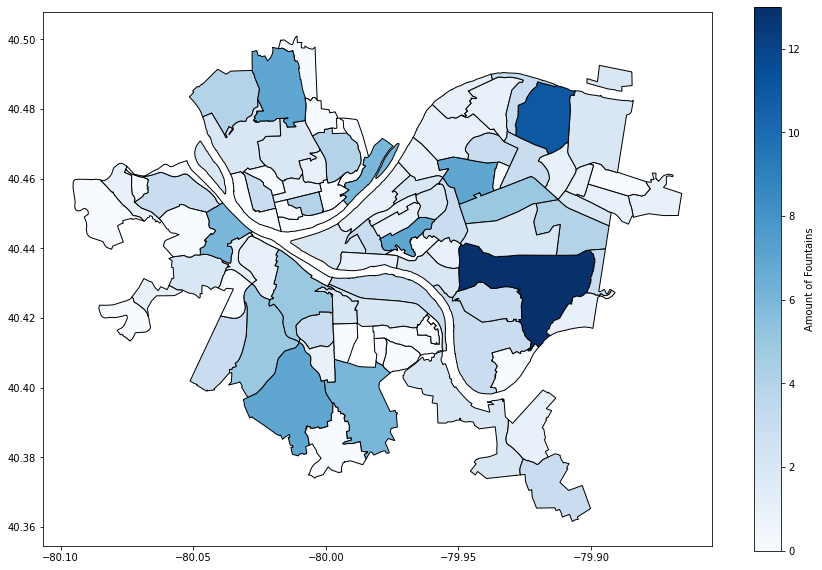

In [13]:
neighborhoodmap = geopandas.read_file("Map/Neighborhoods.shp")
# do the merge
fountain_map = neighborhoodmap.merge(fountain_df, how='left', left_on='hood', right_on='neighborhood')
fountain_map['amount_of_fountains'] = fountain_map['amount_of_fountains'].fillna(0)
# look at the head to confirm it merged correctly
fountain_map[['hood','amount_of_fountains','geometry']]
fountain_map.plot(column='amount_of_fountains', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Amount of Fountains"}, # label the legend
               figsize=(15, 10),         # set the size
               )

#### Conclusion
Based on the data above, one can clearly tell that Squirrel Hill South has the most drinking fountains. While most neighborhoods have at least one, many do not have more than a couple, and only two neighborhoods, including Squirrel Hill South, have over ten. Squirrel Hill South is far superior in terms of drinking fountains, so if you live there, one could say that you would be *swimming* in water (get it?).

![singing in rain guy jumping aroung in water](https://media0.giphy.com/media/m9HKyqt4Xauic/giphy.gif?cid=ecf05e4727u9z8xgryrwaosdtilmnuxajiu63wv57y2y0lhj&rid=giphy.gif&ct=g)

# Giovanna's part!!!!

## Best Neighborhood in Pittsburgh for Dogs (Giovanna's Part)
![alt text](https://media.giphy.com/media/fIrbAgjX4Gjqo/giphy-downsized-large.gif)

## Dogs like friends! Which neighborhoods have the most dog friends?

In [14]:
import pandas as pd

%matplotlib inline

311 is the non-emergency helpline in Pittsburgh. There were previously 500,000 rows of complaints.

In [15]:
#filters out all requests besides "Barking Dog"
data = pd.read_csv("311.csv", index_col="NEIGHBORHOOD", parse_dates=True)
dogStuff = data[data.REQUEST_TYPE == "Barking Dog"]
dogStuff.head(10)

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
NEIGHBORHOOD,,,,,,,,,,,,,,,,
Brighton Heights,32256.0,2015-11-06T14:57:00,Barking Dog,Call Center,1.0,Animal Care & Control,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.029414,40.480043,APPROXIMATE
Brookline,32217.0,2015-11-06T12:57:00,Barking Dog,Call Center,1.0,Animal Care & Control,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,-80.019153,40.394317,APPROXIMATE
Mount Washington,30619.0,2015-11-03T18:05:00,Barking Dog,Website,1.0,Animal Care & Control,3.0,18.0,4.200318e+10,5.0,18.0,3.0,4-5,-80.000728,40.426637,APPROXIMATE
Morningside,30109.0,2015-10-30T17:08:00,Barking Dog,Call Center,1.0,Animal Care & Control,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,-79.923948,40.486686,APPROXIMATE
Crafton Heights,30090.0,2015-10-30T15:59:00,Barking Dog,Website,1.0,Animal Care & Control,2.0,28.0,4.200328e+10,5.0,28.0,6.0,1-17,-80.049404,40.440520,APPROXIMATE
Mount Washington,30051.0,2015-10-30T13:42:00,Barking Dog,Call Center,1.0,Animal Care & Control,3.0,18.0,4.200318e+10,5.0,18.0,3.0,4-5,-80.000428,40.424557,APPROXIMATE
Elliott,30617.0,2015-11-03T17:38:00,Barking Dog,Call Center,1.0,Animal Care & Control,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,-80.041106,40.439968,APPROXIMATE
Windgap,203008.0,2017-12-13T20:57:00,Barking Dog,Website,1.0,Animal Care & Control,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,-80.078004,40.460014,APPROXIMATE
Westwood,202609.0,2017-12-11T19:13:00,Barking Dog,Website,1.0,Animal Care & Control,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-18,-80.042378,40.434077,APPROXIMATE


In [16]:
dogStuff.groupby("NEIGHBORHOOD").count()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
NEIGHBORHOOD,,,,,,,,,,,,,,,,
Allegheny West,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Allentown,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Arlington,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Banksville,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Beechview,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Hill,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Upper Lawrenceville,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
West Oakland,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [17]:
dogStuff.groupby(['NEIGHBORHOOD','REQUEST_TYPE']).size().sort_values(ascending=False)

NEIGHBORHOOD      REQUEST_TYPE
Brookline         Barking Dog     68
Mount Washington  Barking Dog     51
Carrick           Barking Dog     46
Brighton Heights  Barking Dog     31
Beechview         Barking Dog     31
                                  ..
Strip District    Barking Dog      1
Homewood South    Barking Dog      1
Chateau           Barking Dog      1
Hays              Barking Dog      1
Larimer           Barking Dog      1
Length: 69, dtype: int64

In [18]:
#this code removes neighborhoods with less than 10 complaints
def filter_by_barks (x, threshold):
    if len(x) > threshold:
        return True
    else: 
        return False

dog_friends = dogStuff.groupby("NEIGHBORHOOD").filter(filter_by_barks, 
                                                      threshold=10)

dog_friends.groupby("NEIGHBORHOOD").count()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
NEIGHBORHOOD,,,,,,,,,,,,,,,,
Allentown,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Banksville,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Beechview,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Bloomfield,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Brighton Heights,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Brookline,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
Carrick,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
Central Lawrenceville,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Crafton Heights,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [19]:
dogFriends = dog_friends.groupby(['NEIGHBORHOOD']).size().sort_values(ascending=False)
dogFriends.head(25)

NEIGHBORHOOD
Brookline                68
Mount Washington         51
Carrick                  46
Beechview                31
Brighton Heights         31
Highland Park            27
Greenfield               27
Troy Hill                25
Marshall-Shadeland       23
Banksville               21
Sheraden                 21
Perry South              20
Bloomfield               18
Perry North              17
Overbrook                17
Morningside              16
Knoxville                16
Central Lawrenceville    15
Squirrel Hill South      15
East Liberty             15
Stanton Heights          15
Squirrel Hill North      14
Garfield                 12
Crafton Heights          11
Duquesne Heights         11
dtype: int64

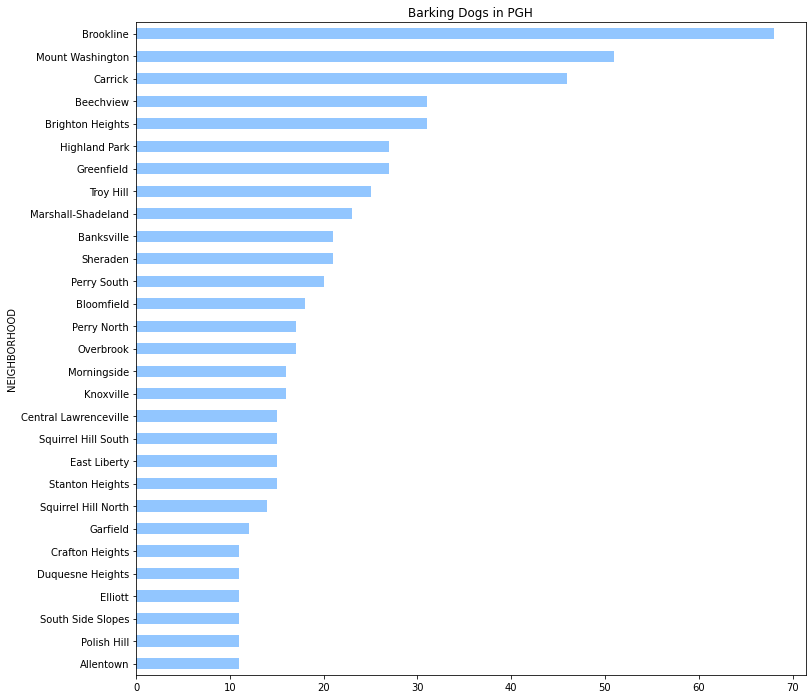

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-pastel')
dogFriends.plot.barh(title = 'Barking Dogs in PGH', x= 'Neighborhood', y='Barking Dogs', figsize=(12,12)).invert_yaxis()

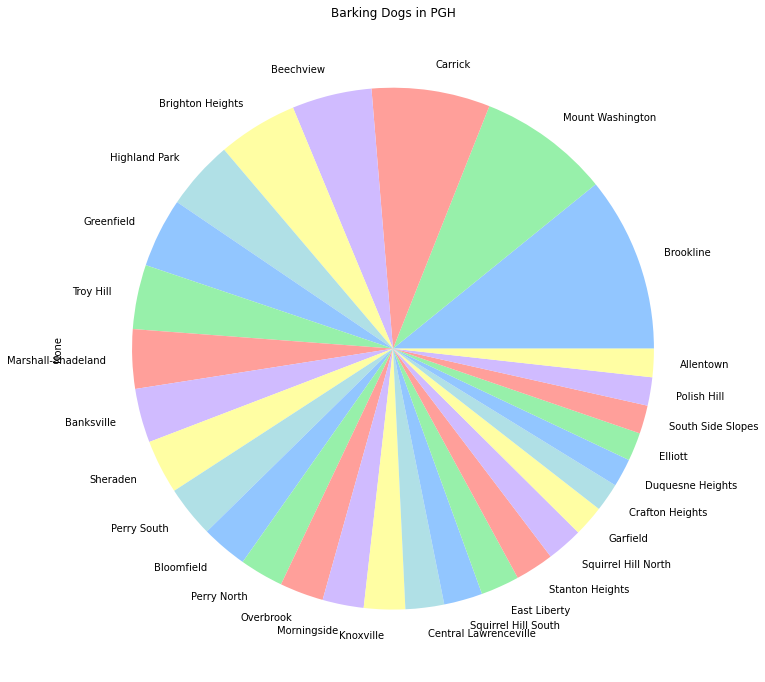

In [21]:
#Now a pie chart
plt.style.use('seaborn-pastel')
dogFriends.plot.pie(figsize = (12,12), title= 'Barking Dogs in PGH')

## Conclusion
We discovered that Brookline is the neighborhood with the most barking dogs. However, this not the only metric that we took into consideration.


# FINAL CONCLUSION
here is the end part (i hope)

### what am i doing?
First, I normalized all the data to make it similar to each other. Then, I added all the data to a new data frame based on the neighborhood name, then set weights to the data to make it so one data point wasn't too important. Finally, I made a stacked bar graph based on neighborhood which added the most important data from each of our parts.

In [22]:
reset_new = df_new.reset_index()
reset_fount = filtered_fountain.reset_index()
reset_fount = reset_fount.rename(columns={'neighborhood': 'HOOD'})
combDf = pd.merge(reset_new, reset_fount, on="HOOD")

#dogFriends = dogFriends.to_frame()

dogFriends.columns =['barkDogs']
df_dog = dogFriends.reset_index()
df_dog.columns =['HOOD','barkDogs']
combDf = pd.merge(combDf, df_dog, on="HOOD")
combDf.head(20)
combDf['Shape__Are'] = combDf['Shape__Are'].apply(lambda x: x/100000)
combDf['barkDogs'] = combDf['barkDogs'].apply(lambda x: x/2)
combDf['amount_of_fountains'] = combDf['amount_of_fountains'].apply(lambda x: x*4)
combDf.head(20)
combDf = combDf.set_index('HOOD')

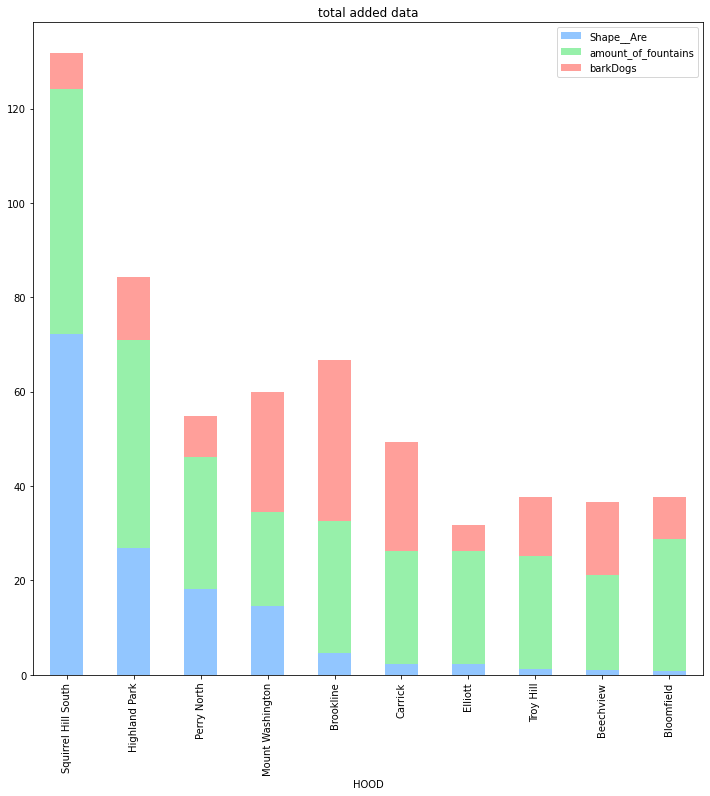

In [23]:
combDf.head(20)
combDf.plot.bar(title = "total added data", figsize = (12,12), stacked=True)

# Squirrel Hill South Wins!!!!!!
After I added all the data into a dataframe then stacked the data for the neighborhoods on top op each other and accounted for weight of each factor it becomes clear that squirrel hill south is the winner based on its park area, amount of public fountains, and number of barking dogs in the neighborhood.